![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Interpolación - Primera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Interpolación de curvas
___
Es usual que las ingenieras y los ingenieros trabajen con datos extraídos de mediciones, relevamientos,
ensayos de laboratorio, etc., los cuales no siempre entregan el valor necesario para el problema
que se está tratando de resolver. Un ejemplo típico de interpolación sencilla utilizado por cualquier
profesional de la ingeniería es la interpolación lineal en una tabla de datos para obtener un valor entre dos puntos dados.

Supongamos que tenemos una lista con datos ordenados en pares y que queremos conocer el valor de $y(x_A)$ para un $x_A$ entre $x_1$ y $x_2$.


| $x$ | $y$
| --- | ---
|$x_0$  | $y_0$
| $x_1$  | $y_1$
| $x_2$  | $y_2$
|$x_3$| $y_3$

¿Cómo lo resolvemos?

### Interpolación de Lagrange
___

El polinomio interpolante se obtiene siguiendo los siguientes pasos:

1.Calculamos los $n+1$ polinomios $L_{n,i}(x)$ relacionados cada uno con cada dato $x_i$, donde $n$ es el grado del polinomio e $i$ indica el punto considerado, mediante:

$$ L_{n,i}(x)=\frac{\displaystyle \prod^n_{\substack{j=0 \\ j\neq i}}(x-x_j) }{\displaystyle \prod^n_{\substack{j=0 \\ j\neq i}}(x_i-x_j)}=\prod^n_{\substack{j=0 \\ j\neq i}}\frac{x-x_j}{x_i-x_j}.$$ 

con $i=0;1; \ldots; n$, $j=0;1; \ldots; n$, y $x_i$ y $x_j$ refieren a los datos disponibles. Estos polinomios cumplen con la particularidad de que:

$$L_{n,i}(x)=
\begin{cases}
1& \text{  si   }x=x_i \\
0& \text{  si   }x = x_j \text{ con } j\neq i.
\end{cases}$$

2.El polinomio interpolante lo obtenemos mediante la expresión:
$$ P_n(x)=\sum^n_{i=0}y_i\ L_{n,i}(x)$$


### Ejemplo con Interpolación de Lagrange de grado 3
___

Para la tabla propuesta al inicio: 

| $x$ | $y$
| --- | ---
|$x_0$  | $y_0$
| $x_1$  | $y_1$
| $x_2$  | $y_2$
|$x_3$| $y_3$

Primero calculamos los $L_{3,i}$
\begin{equation}\begin{split}
L_{3,0}(x)=&\frac{(x-x_1)(x-x_2)(x-x_3)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)} \\
L_{3,1}(x)=&\frac{(x-x_0)(x-x_2)(x-x_3)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)} \\
L_{3,2}(x)=&\frac{(x-x_0)(x-x_1)(x-x_3)}{(x_2-x_0)(x_2-x_1)(x_2-x_3)} \\
L_{3,3}(x)=&\frac{(x-x_0)(x-x_1)(x-x_2)}{(x_3-x_0)(x_3-x_1)(x_3-x_2)} \\
\end{split}\end{equation}

Y finalmente el polinomio resulta:

$$ P_3(x)= y_0L_{3,0}(x)+y_1L_{3,1}(x)+y_2L_{3,3}(x)+y_3L_{3,3}(x) $$


In [1]:
def Lagrange (df,x):
    N=len(df)
    L=np.zeros(N)
    P=0
    for i in range (0,N):
        if x==df['x'][i]:         #Para que no divida por cero .
            return df['y'][i]
        num=1
        den=1
        for j in range (0,N):
            if j != i:
                num*=x-df['x'][j]
                den*=df['x'][i]-df['x'][j]
        L[i]=num/den
        P+=L[i]*df['y'][i]
    return P,L, print('Por el método de Lagrange obtenemos P(x=',x,')=',round(P,5))

### Resolvamos un ejemplo numérico
___

Supongamos que tenemos la siguiente tabla y queremos calcular $P(4.5)=?$

|$i$| $x$ | $y$
| ---| --- | ---
|$0$ |2 | 7
|$1$| 4 | 6
|$2$| 5  | 9
|$3$|7| 12

In [2]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos
import matplotlib.pyplot as plt #librería para graficar

#Cargo los datos

data = [[2, 7], [4, 6], [5, 9], [7, 12]]
df = pd.DataFrame(data, columns = ['x', 'y'])

xp=4.5

ejemplo=Lagrange (df,xp)

Por el método de Lagrange obtenemos P(x= 4.5 )= 7.41667


In [3]:
from IPython.display import display, Math

N=len(df)
x = df['x']
y = df['y']
PL=np.round(ejemplo[0],4)
L=np.round(ejemplo[1],4)

print ("Calculamos primero los coeficientes L: \n")  

for p in range (0,N):
    ec = "L_{"+str(N-1)+","+str(p)+"}= "
    k=[]
    for j in range (0,N):
        if j != p:
            k.append(j)
    num=""
    den=""
    numnu=""
    dennu=""
    for m in range (0,N-1):
        num+="(x-x_"+str(k[m])+")"
        den+="(x_"+str(p)+"-x_"+str(k[m])+")"
        numnu+="("+str(xp)+"-"+str(x[k[m]])+")"
        dennu+="("+str(x[p])+"-"+str(x[k[m]])+")"
    ecu="\\frac{"+str(num)+"}{"+str(den)+"}="
    ecunu="\\frac{"+str(numnu)+"}{"+str(dennu)+"}="
    resul=str(round(L[p],5))
    display(Math((ec+ecu+ecunu+resul)))

print ("\n Armando el polinomio obtenemos: \n")

pol = "P_{"+str(N-1)+"}(x)= "

termp=""
for p in range (0,N-1):
    termp += "y_"+str(p)+"L_{"+str(N-1)+","+str(p)+"}+"

termf="y_"+str(N-1)+"L_{"+str(N-1)+","+str(N-1)+"}"
display(Math((pol+termp+termf)))

print ("\n Reemplazando por los valores obtenemos: \n")

polnu = "P_{"+str(N-1)+"}(x="+str(xp)+")= "

termpnu=""
for p in range (0,N-1):
    termpnu += "("+str(y[p])+")("+str(L[p])+")+"

termfnu= "("+str(y[N-1])+")("+str(L[N-1])+")="

display(Math((polnu+termpnu+termfnu+str(round(PL,5)))))

Calculamos primero los coeficientes L: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Armando el polinomio obtenemos: 



<IPython.core.display.Math object>


 Reemplazando por los valores obtenemos: 



<IPython.core.display.Math object>

### Interpolación de Lagrange Baricéntrico
___

A partir del método de **Lagrange**, reordenando los términos:

1. Definimos el coeficiente $L(x)$ como:

$$ L(x)=(x-x_0)(x-x_1)\ldots(x-x_n)$$ 

2. Definamos además los pesos baricéntricos como
$$ w_i=\prod^n_{\substack{k=0 \\k\neq i}}\frac{1}{x_i-x_k}, \text{  para todo  }i=0;1;\ldots;n. $$ 

3. Entonces podemos escribir el polinomio interpolante:

$$ P_n(x)=\sum^n_{i=0}f(x_i)\frac{L(x)w_i}{x-x_i}=L(x)\sum^n_{i=0}f(x_i)\frac{w_i}{x-x_i},$$

pues $L(x)$ es constante para todos los términos de la sumatoria.

Esto es una gran ventaja ya que si agregamos un par de datos $x_{n+1}, f(x_{n+1})$, sólo debemos hacer lo siguiente:
- Dividir cada $w_i$ por $x_i-x_{n+1}$.
- Calcular un nuevo $w_{i+1}$.

In [9]:
def LagrangeBaricentrico (df,x):
    N=len(df)
    W=np.zeros(N)
    P=0
    L=1
    PB=0
    for i in range (0,N):
        if x==df['x'][i]:         #Para que no divida por cero .
            return df['y'][i]
        L*=x-df['x'][i]
        w=1
        for j in range (0,N):
            if j != i:
                 w*=1/(df['x'][i]-df['x'][j])
        W[i]=w
        P+=(w*df['y'][i])/(x-df['x'][i])
    PB=L*P
    return PB,L,W, print('Por el método de Lagrange Baricéntrico obtenemos P(x=',x,')=',round(PB,5))

In [10]:
#Rehago el mismo ejemplo que anteriormente:
ejemplodos=LagrangeBaricentrico (df,xp)  

Por el método de Lagrange Baricéntrico obtenemos P(x= 4.5 )= 7.41667


In [11]:
from IPython.display import display, Math

N=len(df)
x = df['x']
y = df['y']
PLB=np.round(ejemplodos[0],4)
L=np.round(ejemplodos[1],4)
W=np.round(ejemplodos[2],4)

print ("Calculamos primero el coeficiente L: ")  

coefL = "L(x)= "

termL=""
for p in range (0,N):
    termL += "(x-x_"+str(p)+")"

display(Math((coefL+termL)))

coefLnu = "L(x={"+str(xp)+"})= "
termLnu=""
for p in range (0,N):
    termLnu += "("+str(xp)+"-"+str(x[p])+")"
resulL="="+str(L)

display(Math((coefLnu+termLnu+resulL)))

print ("\n Luego calculamos los coeficientes de peso: ")  

for p in range (0,N):
    ecW = "W_{"+str(N-1)+","+str(p)+"}= "
    k=[]
    for j in range (0,N):
        if j != p:
            k.append(j)
    den=""
    dennu=""
    for m in range (0,N-1):
        den+="(x_"+str(p)+"-x_"+str(k[m])+")"
        dennu+="("+str(x[p])+"-"+str(x[k[m]])+")"
    ecuW="\\frac{1}{"+str(den)+"}="
    ecunuW="\\frac{1}{"+str(dennu)+"}="
    resulW=str(round(W[p],5))
    display(Math((ecW+ecuW+ecunuW+resulW)))

print ("\n Armando el polinomio obtenemos: ")
pol2="P_"+str(N-1)+"(x) = L(x)\\sum^"+str(N-1)+"_{i=0}f(x_i)\\frac{w_i}{x-x_i}=L(x)["

polLBt = ""
for p in range (0,N-1):
    polLBt += "f(x_"+str(p)+")\\frac{w_"+str(p)+"}{x-x_"+str(p)+"}+"
polLBf= "f(x_"+str(N-1)+")\\frac{w_"+str(N-1)+"}{x-x_"+str(N-1)+"}"

display(Math((pol2+polLBt+polLBf)))

print ("\n Reemplazando por los valores obtenemos: ")
pol2nu="P_"+str(N-1)+"(x="+str(xp)+") = ("+str(L)+")["

polLBtnu = ""
for p in range (0,N-1):
    polLBtnu += "("+str(y[p])+")\\frac{("+str(W[p])+")}{"+str(xp)+"-"+str(x[p])+"}+"
polLBfnu= "("+str(y[N-1])+")\\frac{("+str(W[N-1])+")}{"+str(xp)+"-"+str(x[N-1])+"}="

display(Math((pol2nu+polLBtnu+polLBfnu+str(PLB))))

Calculamos primero el coeficiente L: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Luego calculamos los coeficientes de peso: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Armando el polinomio obtenemos: 


<IPython.core.display.Math object>


 Reemplazando por los valores obtenemos: 


<IPython.core.display.Math object>

In [12]:
def LagrangePlot (df,x):
    N=len(df)
    L=np.zeros(N)
    P=0
    for i in range (0,N):
        if x==df['y'][i]:         #Para que no divida por cero .
            return df['y'][i]
        num=1
        den=1
        for j in range (0,N):
            if j != i:
                num*=x-df['x'][j]
                den*=df['x'][i]-df['x'][j]
        L[i]=num/den
        P+=L[i]*df['y'][i]
    return P

def LagrangeBaricentricoPlot (df,x):
    N=len(df)
    W=np.zeros(N)
    P=0
    L=1
    PB=0
    for i in range (0,N):
        if x==df['y'][i]:         #Para que no divida por cero .
            return df['y'][i]
        L*=x-df['x'][i]
        w=1
        for j in range (0,N):
            if j != i:
                 w*=1/(df['x'][i]-df['x'][j])
        W[i]=w
        P+=(w*df['y'][i])/(x-df['x'][i])
    PB=L*P
    return PB

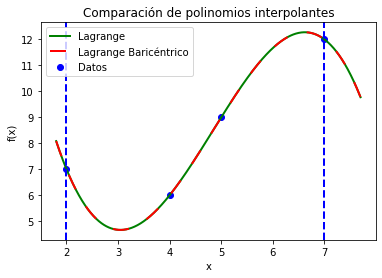

In [13]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')

ejex = np.linspace(min(df['x'])*0.9, max(df['x'])*1.1,num=1000)
Nx=len(ejex)
y_pl=np.zeros(Nx)
y_plb=np.zeros(Nx)

for i in range(0,Nx):
    y_pl[i] = LagrangePlot(df,ejex[i]);
    
for i in range(0,Nx):
    y_plb[i] = LagrangeBaricentricoPlot(df,ejex[i]);
    
plt.plot(ejex, y_pl, linewidth=2, color = 'green')
plt.plot(ejex, y_plb, linewidth=2, color = 'red',linestyle=(0, (8, 10)))
plt.scatter(df['x'], df['y'], color = 'blue')
plt.legend(['Lagrange','Lagrange Baricéntrico','Datos','limite','dato'],fontsize=10)
plt.axvline(min(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.axvline(max(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.title('Comparación de polinomios interpolantes');

![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Gracias por su atención
***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*